#### Constant tensors and variables

In [79]:
# All-ones
import tensorflow as tf

x = tf.ones((2, 3))
print(x)  # <tf.Tensor: shape=(2, 3), dtype=float32, numpy=...>

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


In [80]:
# All-zeros
x = tf.zeros((2, 3))
print(x)  # <tf.Tensor: shape=(2, 3), dtype=float32, numpy=...>

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)


In [81]:
# Random tensors
x = tf.random.uniform((2, 3), minval=0, maxval=1) # between 0 and 1
print(x)  # <tf.Tensor: shape=(2, 3), dtype=float32, numpy=...>
print()
x = tf.random.normal((2, 3), mean=0, stddev=1) # Mean 0 and standard deviation 1.
print(x)  # <tf.Tensor: shape=(2, 3), dtype=float32, numpy=...>

tf.Tensor(
[[0.82794154 0.14513624 0.00158167]
 [0.24794507 0.05961061 0.42117798]], shape=(2, 3), dtype=float32)

tf.Tensor(
[[ 0.0568318   0.3809328   0.3885336 ]
 [-0.44486102 -0.15985307  0.3368398 ]], shape=(2, 3), dtype=float32)


A significant difference between NumPy arrays and TensorFlow tensors is that Tensor-
Flow tensors aren’t assignable: they’re constant.

In [82]:
# NumPy arrays are assignable
import numpy as np
x = np.ones((2, 3))
x[0, 0] = 0
print(x)  # [[0. 1. 1.] [1. 1. 1.]]

[[0. 1. 1.]
 [1. 1. 1.]]


In [83]:
# TensorFlow tensors are not assignable
x = tf.ones((2, 3))
x[0, 0] = 0  # Error: Tensor is immutable
print(x)  # <tf.Tensor: shape=(2, 3), dtype=float32, numpy=...>

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [ ]:
# Creating a TensorFlow variable
print('Creating a TensorFlow variable:')
x = tf.Variable(tf.random.normal((2, 3))) #To create a variable, you need to provide some initial value, such as a random tensor.
x[1, 1].assign(99)  # Assigning a value to a variable
print(x)  # <tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=...>

# The state of a variable can be modified via its assign method, as follows.
print(f'\nAssigning a value to a TensorFlow variable:')
x.assign(tf.ones((2, 3)))  # Assigning a new value to the variable
print(x)  # <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=...>

print(f'\nAssigning a value to a subset of a TensorFlow variable:')
x[0, 1].assign(99)  # Assigning a value to a specific element of the variable
print(x)  # <tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=...>

Creating a TensorFlow variable:
<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[-4.3386579e-01,  5.7397783e-01,  2.8143653e-01],
       [ 4.0824185e-03,  9.9000000e+01, -9.6249193e-01]], dtype=float32)>

Assigning a value to a TensorFlow variable:
<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

Assigning a value to a subset of a TensorFlow variable:
<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 1., 99.,  1.],
       [ 1.,  1.,  1.]], dtype=float32)>


#### Tensor operations: Doing math in TensorFlow

In [46]:
# Just like NumPy, TensorFlow offers a large collection of tensor operations to express mathematical formulas.
a = tf.random.normal((2, 2)) # 2x3 tensor of ones
print(f'Tensor: \n{a}')  # <tf.Tensor: shape=(2, 3), dtype=float32, numpy=...>
b = tf.square(a) # Take the square of each element
print(f'\nSquare:\n {b}')  # <tf.Tensor: shape=(2, 3), dtype=float32, numpy=...>
c = tf.sqrt(a) # Take the square root of each element
print(f'\nSquare root:\n {c}')  # <tf.Tensor: shape=(2, 3), dtype=float32, numpy=...>
d = c + b # Add two tensors
print(f'\nAddition:\n {d}')  # <tf.Tensor: shape=(2, 3), dtype=float32, numpy=...>
e = tf.matmul(a, b) # Matrix multiplication
e *= d # Multiply two tensors
print(f'\nMultiplication:\n {e}')  # <tf.Tensor: shape=(2, 3), dtype=float32, numpy=...>

Tensor: 
[[ 1.583734   -0.35057518]
 [ 0.40060303  1.0198795 ]]

Square:
 [[2.5082135  0.12290296]
 [0.16048278 1.0401541 ]]

Square root:
 [[1.2584649         nan]
 [0.63293207 1.0098908 ]]

Addition:
 [[3.7666783         nan]
 [0.79341483 2.050045  ]]

Multiplication:
 [[14.750621         nan]
 [ 0.9270822  2.2756877]]


#### A second look at the GradientTape API

In [50]:
# Using the GradientTape
input_var = tf.Variable(initial_value = 3.0)
with tf.GradientTape() as tape:
    result = tf.square(input_var) # y = x^2
gradient = tape.gradient(result, input_var) # y = 2x -> y = 2 * 3 = 6
print("Gradiente:", gradient.numpy())

Gradiente: 6.0


In [51]:
# Using GradientTape with constant tensor inputs
input_const = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(input_const) # Watch the constant tensor
    result = tf.square(input_const) # y = x^2
gradient = tape.gradient(result, input_const) # y = 2x -> y = 2 * 3 = 6
print("Gradiente:", gradient.numpy()) # Gradient is None because input_const is not a variable

Gradiente: 6.0


In [92]:
# Using nested gradient tapes to compute second-order gradients
x = tf.Variable(tf.random.normal((2, 3)), dtype=tf.float32) # Random variable
with tf.GradientTape() as segunda:
    with tf.GradientTape() as primera:
        y = x**3 # y = x^3
    dy_dx = primera.gradient(y, x) # y' = 3x^2  -> dy/dx = 3 * 3^2 = 27
dy2_dx2 = segunda.gradient(dy_dx, x) # y'' = 6x^2 -> dy2/dx2 = 6 * 3 = 18
print(f'First derivative: {dy_dx.numpy()}') 
print(f'Second derivative: {dy2_dx2.numpy()}')

First derivative: [[0.40903437 0.3483882  7.1193295 ]
 [1.522322   0.95670193 2.1377828 ]]
Second derivative: [[ 2.2154937  2.0446658 -9.242941 ]
 [ 4.274092   3.3882773  5.064918 ]]


In [90]:
time = tf.Variable(tf.random.normal((2, 3)))  # Time variable
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

print(f'Position: {position.numpy()}')
print(f'Speed: {speed.numpy()}')

Position: [[ 8.225901    0.44124174  0.7036323 ]
 [10.874526    0.42015687  2.6559587 ]]
Speed: [[-12.697546   -2.9408057   3.7136495]
 [ 14.5993395   2.869682   -7.2150393]]


#### An end-to-end example: A linear classifier in pure TensorFlow

In [102]:
# Generating two classes of random points in a 2D plane
import numpy as np
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0, 3],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1, 0.5],[0.5, 1]],
    size = num_samples_per_class
)
positive_samples

array([[ 3.13460495, -1.14608716],
       [ 0.81986158, -1.71219049],
       [ 1.78164731, -1.29684045],
       ...,
       [ 2.85837306,  1.28208879],
       [ 3.01370775, -1.17579099],
       [ 3.04701605,  1.24387589]])

In [105]:
# Stacking the two classes into an array with shape (2000, 2)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs.shape

(2000, 2)

In [104]:
# Generating the corresponding targets (0 and 1)
targets = np.vstack((
    np.zeros(
        (num_samples_per_class, 1), dtype="float32"),
        np.ones((num_samples_per_class, 1), dtype="float32")
    )
)
targets.shape

(2000, 1)

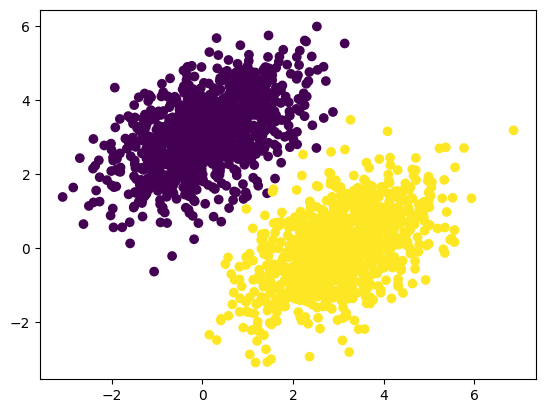

In [111]:
# Plotting the two point classes
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [119]:
# Creating the linear classifier variables
input_dim = 2
output_dim = 1
W = tf.Variable(tf.random.normal(shape=(2, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))


def model(inputs):
    return tf.matmul(inputs, W) + b

model(inputs[:5, :]), targets[:5, :]  # Model output for the first 5 samples

(<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
 array([[ 1.6116992 ],
        [10.164703  ],
        [-0.04701793],
        [ 0.39118612],
        [ 1.9284029 ]], dtype=float32)>,
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32))

In [114]:
# The mean squared error loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

y_true = tf.constant([1.0, 2.0, 3.0])
y_pred = tf.constant([1.5, 2.0, 2.5])
loss = square_loss(y_true, y_pred)
print(f"Mean squared error: {loss.numpy()}")

Mean squared error: 0.1666666716337204


In [120]:
# The training step function
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
    loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [124]:
import tensorflow as tf
import numpy as np

# Datos sintéticos
inputs = tf.random.normal((100, 2))
targets = tf.matmul(inputs, [[2.0], [-3.0]]) + 1.0

# Variables entrenables
W = tf.Variable(tf.random.normal((2, 1)))
b = tf.Variable(tf.zeros((1,)))

# Función de pérdida
def square_loss(predictions, targets):
    return tf.reduce_mean(tf.square(predictions - targets))

# Modelo simple
def model(x):
    return tf.matmul(x, W) + b

# Paso de entrenamiento
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    gradients = tape.gradient(loss, [W, b])
    W.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)
    return loss

for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step+1}: {loss:.4f}")



Loss at step 1: 12.5679
Loss at step 2: 7.1792
Loss at step 3: 4.1380
Loss at step 4: 2.4089
Loss at step 5: 1.4174
Loss at step 6: 0.8436
Loss at step 7: 0.5081
Loss at step 8: 0.3097
Loss at step 9: 0.1910
Loss at step 10: 0.1192
Loss at step 11: 0.0752
Loss at step 12: 0.0479
Loss at step 13: 0.0308
Loss at step 14: 0.0200
Loss at step 15: 0.0131
Loss at step 16: 0.0086
Loss at step 17: 0.0057
Loss at step 18: 0.0038
Loss at step 19: 0.0025
Loss at step 20: 0.0017
Loss at step 21: 0.0011
Loss at step 22: 0.0008
Loss at step 23: 0.0005
Loss at step 24: 0.0003
Loss at step 25: 0.0002
Loss at step 26: 0.0002
Loss at step 27: 0.0001
Loss at step 28: 0.0001
Loss at step 29: 0.0000
Loss at step 30: 0.0000
Loss at step 31: 0.0000
Loss at step 32: 0.0000
Loss at step 33: 0.0000
Loss at step 34: 0.0000
Loss at step 35: 0.0000
Loss at step 36: 0.0000
Loss at step 37: 0.0000
Loss at step 38: 0.0000
Loss at step 39: 0.0000
Loss at step 40: 0.0000


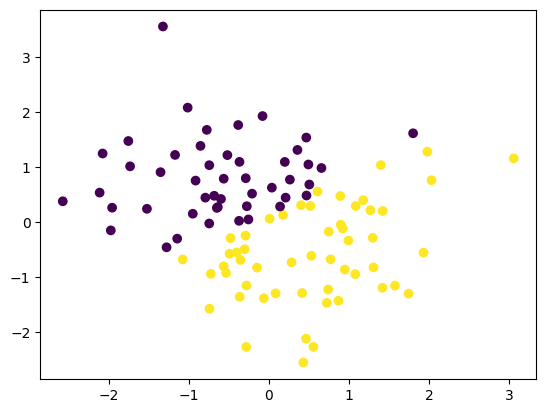

In [125]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()